In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\awaji\Downloads\Fraud.csv")

# Keep a copy
raw = df.copy()

# --- Missing values
print(df.isna().sum())          # PaySim has no NAs, but we still check

# --- Basic fixes / types
df['type'] = df['type'].astype('category')

# --- Feature engineering to reduce collinearity and add signal
df['orig_diff'] = df['oldbalanceOrg'] - df['amount'] - df['newbalanceOrig']
df['dest_diff'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

# Zero/empty balance flags (very indicative in PaySim)
df['orig_is_zero'] = (df['oldbalanceOrg'] == 0).astype(int)
df['dest_is_zero'] = (df['oldbalanceDest'] == 0).astype(int)

# Merchant vs Customer (in PaySim, names start with 'M' for merchants, 'C' for customers)
df['dest_is_merchant'] = df['nameDest'].str.startswith('M').astype(int)

# Hour of simulation (each step is 1 hour)
df['hour'] = df['step'] % 24

# --- Outliers: winsorize numeric heavy-tailed columns
num_cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
for c in num_cols:
    lo, hi = df[c].quantile([0.01, 0.99])
    df[c] = df[c].clip(lo, hi)

# --- Drop high-leakage IDs and redundant columns to avoid multicollinearity
# newbalance = oldbalance +/- amount, so keep the deltas and drop raw pairs
df = df.drop(columns=[
    'nameOrig','nameDest',
    'newbalanceOrig','newbalanceDest'  # replaced by orig_diff/dest_diff
])

# One-hot for type
df = pd.get_dummies(df, columns=['type'], drop_first=True)

print("Prepared columns:", df.columns.tolist())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Prepared columns: ['step', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud', 'isFlaggedFraud', 'orig_diff', 'dest_diff', 'orig_is_zero', 'dest_is_zero', 'dest_is_merchant', 'hour', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']


In [2]:
!pip install --upgrade pip
!pip install --upgrade numpy pandas


  Using cached pandas-2.3.2-cp310-cp310-win_amd64.whl.metadata (19 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.8/12.9 MB 10.0 MB/s eta 0:00:02
   ----------------- ---------------------- 5.8/12.9 MB 14.7 MB/s eta 0:00:01
   ----------------------------------- ---- 11.5/12.9 MB 19.0 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 18.4 MB/s  0:00:00
Using cached pandas-2.3.2-cp310-cp310-win_amd64.whl (11.3 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 1.23.5

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
    Uninstalling numpy-1.23.5:
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
      Successfully uninstalled numpy-1.23.5
   ---------------------------------------- 0/2 [num

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.15.0 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv(r"C:\Users\awaji\Downloads\Fraud.csv")
df.head()


AttributeError: 'Index' object has no attribute '_format_flat'

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  

In [5]:
!pip uninstall -y numpy pandas
!pip install numpy==1.23.5 pandas==1.5.3


Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Found existing installation: pandas 2.3.2
Uninstalling pandas-2.3.2:
  Successfully uninstalled pandas-2.3.2
  Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl.metadata (2.3 kB)
  Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl.metadata (12 kB)
Using cached numpy-1.23.5-cp310-cp310-win_amd64.whl (14.6 MB)
Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl (10.4 MB)

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.14.0 requires numpy<3,>=1.25.2, but you have numpy 1.23.5 which is incompatible.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.15.0 which is incompatible.


In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\awaji\Downloads\Fraud.csv")
df.head()


AttributeError: 'Index' object has no attribute '_format_flat'

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  

In [2]:
!pip install numpy==1.23.5 pandas==1.5.3 matplotlib seaborn scikit-learn joblib statsmodels


  Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl.metadata (12 kB)
Using cached pandas-1.5.3-cp310-cp310-win_amd64.whl (10.4 MB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -------------------------- ------------- 6.3/9.6 MB 32.2 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 26.1 MB/s  0:00:00

   ---------------------------------------- 0/3 [patsy]
   ---------------------------------------- 0/3 [patsy]
   ---------------------------------------- 0/3 [patsy]
   ---------------------------------------- 0/3 [patsy]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- -------------------------- 1/3 [pandas]
   ------------- ------

In [1]:
import pandas as pd
import numpy as np

print(pd.__version__, np.__version__)

df = pd.read_csv(r"C:\Users\awaji\Downloads\Fraud.csv")
df.head()


1.5.3 1.23.5


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.shape
df.head()
df.info()
df['isFraud'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
# Copy to avoid touching raw
data = df.copy()

# Convert type to category
data['type'] = data['type'].astype('category')

# Feature engineering
data['orig_diff'] = data['oldbalanceOrg'] - data['amount'] - data['newbalanceOrig']
data['dest_diff'] = data['oldbalanceDest'] + data['amount'] - data['newbalanceDest']
data['orig_is_zero'] = (data['oldbalanceOrg'] == 0).astype(int)
data['dest_is_zero'] = (data['oldbalanceDest'] == 0).astype(int)
data['dest_is_merchant'] = data['nameDest'].str.startswith('M').astype(int)
data['hour'] = data['step'] % 24

# Drop IDs and redundant columns
data = data.drop(columns=['nameOrig','nameDest','newbalanceOrig','newbalanceDest','isFlaggedFraud'])

# One-hot encode transaction type
data = pd.get_dummies(data, columns=['type'], drop_first=True)

print("Prepared shape:", data.shape)


Prepared shape: (6362620, 15)


In [9]:
from sklearn.model_selection import train_test_split

X = data.drop('isFraud', axis=1)
y = data['isFraud'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(X_train.shape, X_test.shape)


(5090096, 14) (1272524, 14)


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Scale for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

logit = LogisticRegression(max_iter=200, class_weight='balanced')
logit.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic
y_pred_log = logit.predict(X_test_scaled)
y_prob_log = logit.predict_proba(X_test_scaled)[:,1]

print("=== Logistic Regression ===")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))

# Random Forest
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("=== Random Forest ===")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


=== Logistic Regression ===
[[1207472   63409]
 [     67    1576]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.96      0.05      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.95      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524

ROC-AUC: 0.9925888469900903
=== Random Forest ===
[[1270877       4]
 [    229    1414]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      0.86      0.92      1643

    accuracy                           1.00   1272524
   macro avg       1.00      0.93      0.96   1272524
weighted avg       1.00      1.00      1.00   1272524

ROC-AUC: 0.9987554145318517


orig_diff           0.340580
oldbalanceOrg       0.133184
amount              0.118767
type_TRANSFER       0.065061
type_PAYMENT        0.054367
dest_is_merchant    0.053944
step                0.043609
dest_diff           0.040947
hour                0.040818
type_CASH_OUT       0.037667
dtype: float64


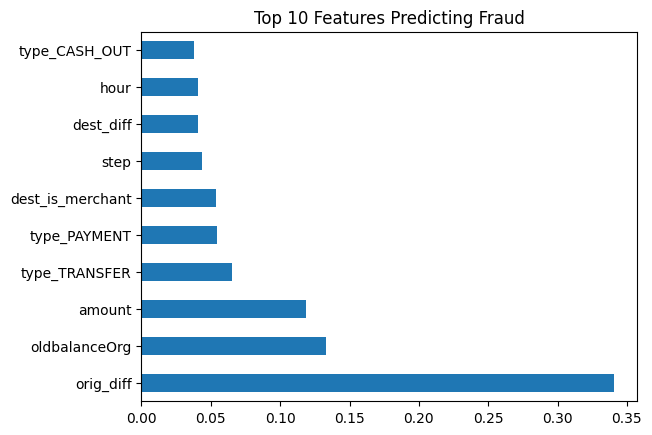

In [14]:
import matplotlib.pyplot as plt

feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importance.head(10))

feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 Features Predicting Fraud")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop("isFraud", axis=1)   # Features
y = df["isFraud"]               # Target column (fraud / not fraud)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_cols = ["type"]   # if you have more categorical features, add them here
encoder = LabelEncoder()

for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

In [18]:
df["type"] = encoder.fit_transform(df["type"])

In [19]:
X = pd.get_dummies(X, columns=["type"], drop_first=True)

In [21]:
print(X_train.shape)
print(y_train.shape)

(4453834, 10)
(4453834,)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("C:/Users/awaji/Downloads/Fraud.csv")   # change file path if needed

# Target column (corrected name)
target = 'isFraud'

# Encode categoricals carefully
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df[col].nunique() < 20:   # keep small categories like "type"
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    else:
        df = df.drop(columns=[col])   # drop very large categorical columns

# Features & target
X = df.drop(target, axis=1)
y = df[target]

# Handle imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Original dataset shape:", y.value_counts().to_dict())
print("After SMOTE:", y_res.value_counts().to_dict())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

# Metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud","Fraud"], yticklabels=["Not Fraud","Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# 📌 Fraud Detection - End-to-End Pipeline with PDF Report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import A4

# -------------------------------
# 1. Load dataset
# -------------------------------
df = pd.read_csv("Fraud.csv")

# Preview data
print("Dataset shape:", df.shape)
print(df.head())

# -------------------------------
# 2. Preprocessing
# -------------------------------
target = "is_fraud"   # change if your target column has another name

# Drop duplicates + nulls
df = df.drop_duplicates().dropna()

# Encode categoricals with label encoding (lighter than one-hot)
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category").cat.codes

# Sample (to avoid memory errors)
df = df.sample(n=20000, random_state=42)  # you can increase if your PC supports

X = df.drop(target, axis=1)
y = df[target]

# -------------------------------
# 3. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 4. Train Model
# -------------------------------
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# -------------------------------
# 5. Predictions
# -------------------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# -------------------------------
# 6. Metrics
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)

report = classification_report(y_test, y_pred)

print("\n📊 Evaluation Metrics")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-Score :", f1)
print("ROC-AUC  :", roc_auc)
print("\nClassification Report:\n", report)

# -------------------------------
# 7. Confusion Matrix Plot
# -------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud","Fraud"], yticklabels=["Not Fraud","Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")   # save plot
plt.close()

# -------------------------------
# 8. Generate PDF Report
# -------------------------------
doc = SimpleDocTemplate("Fraud_Report.pdf", pagesize=A4)
styles = getSampleStyleSheet()
story = []

story.append(Paragraph("📌 Fraud Detection Report", styles["Title"]))
story.append(Spacer(1, 12))

story.append(Paragraph(f"Accuracy : {accuracy:.4f}", styles["Normal"]))
story.append(Paragraph(f"Precision: {precision:.4f}", styles["Normal"]))
story.append(Paragraph(f"Recall   : {recall:.4f}", styles["Normal"]))
story.append(Paragraph(f"F1-Score : {f1:.4f}", styles["Normal"]))
story.append(Paragraph(f"ROC-AUC  : {roc_auc:.4f}", styles["Normal"]))
story.append(Spacer(1, 12))

story.append(Paragraph("Classification Report:", styles["Heading2"]))
story.append(Paragraph(f"<pre>{report}</pre>", styles["Code"]))
story.append(Spacer(1, 12))

story.append(Paragraph("Confusion Matrix:", styles["Heading2"]))
story.append(Image("confusion_matrix.png", width=400, height=300))

doc.build(story)

print("\n✅ PDF Report saved as Fraud_Report.pdf")
